In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import math
import numpy as np
from pylab import rcParams
import matplotlib
from numpy import trapz
import pandas as pd

In [2]:
rcParams["figure.figsize"]=10, 2.5
matplotlib.rcParams["figure.facecolor"] = "0.9"
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 15

In [3]:
NMR= pd.read_csv("./PUZ-480-ReT-DMF.csv", header = None, skiprows = 0, sep = "\t")

In [4]:
NMR.columns = ["CS", "intensity", "1"]
print(NMR)

             CS  intensity   1
0      -5.01771  -0.435760 NaN
1      -5.01733  -0.435760 NaN
2      -5.01694   0.719994 NaN
3      -5.01656   1.875740 NaN
4      -5.01618   2.004160 NaN
...         ...        ...  ..
52425  15.02380  -2.527890 NaN
52426  15.02420  -1.099250 NaN
52427  15.02460   0.334740 NaN
52428  15.02500   0.056503 NaN
52429  15.02540  -0.221733 NaN

[52430 rows x 3 columns]


In [18]:
#integeration minimum chemcial shift value of DCM
P1 = [n for n, i in enumerate (NMR.CS) if i>5.45][0]
print("P1 =", P1)
P2 = [n for n, i in enumerate (NMR.CS) if i>5.55][0]
print("P2 =", P2)

P1 = 27382
P2 = 27644


In [19]:
Average_P1 = (NMR.intensity[P1-2]+NMR.intensity[P1-1]+NMR.intensity[P1]+NMR.intensity[P1+1]+NMR.intensity[P1+2])/5
Average_P2 = (NMR.intensity[P2-2]+NMR.intensity[P2-1]+NMR.intensity[P2]+NMR.intensity[P2+1]+NMR.intensity[P2+2])/5
Intensity_min_DCM = (Average_P1+Average_P2)/2
NMR_intensity_corr_DCM = NMR.intensity-Intensity_min_DCM

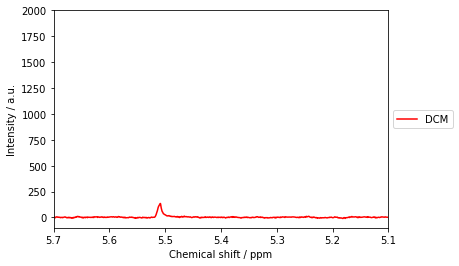

In [20]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_DCM, "r", label='DCM')
ax.set_xlim(5.7, 5.1)
ax.set_ylim(-100, 2000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
Peak_int_NMR_DCM = trapz (NMR_intensity_corr_DCM[P1:P2], dx = 1)
print("DCM peak area =", Peak_int_NMR_DCM)

DCM peak area = 4201.897489999999


In [38]:
#integeration minimum chemcial shift value of formate
P3 = [n for n, i in enumerate (NMR.CS) if i>8.3][0]
print("P3 =", P3)
P4 = [n for n, i in enumerate (NMR.CS) if i>8.35][0]
print("P4 =", P4)

P3 = 34837
P4 = 34968


In [39]:
Average_P3 = (NMR.intensity[P3-2]+NMR.intensity[P3-1]+NMR.intensity[P3]+NMR.intensity[P3+1]+NMR.intensity[P3+2])/5
Average_P4 = (NMR.intensity[P4-2]+NMR.intensity[P4-1]+NMR.intensity[P4]+NMR.intensity[P4+1]+NMR.intensity[P4+2])/5
Intensity_min_formate = (Average_P3+Average_P4)/2
NMR_intensity_corr_formate = NMR.intensity-Intensity_min_formate

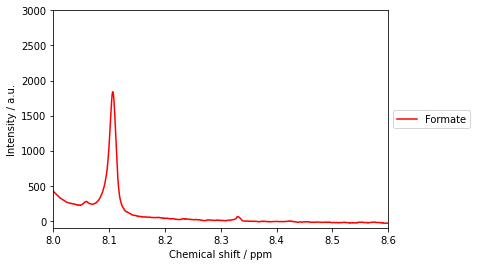

In [40]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_formate, "r", label='Formate')
ax.set_xlim(8.0, 8.6)
ax.set_ylim(-100, 3000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
Peak_int_NMR_formate = trapz (NMR_intensity_corr_formate[P3:P4], dx = 1)
print("Formate peak area =", Peak_int_NMR_formate)

Formate peak area = 1732.2329999999997


In [42]:
Ratio = Peak_int_NMR_formate/Peak_int_NMR_DCM
print("Formate/DCM =", Ratio)

Formate/DCM = 0.4122501808105747


In [34]:
Peak_int_sum = []
Peak_int_sum.append(Peak_int_NMR_formate)
Peak_int_sum.append(Peak_int_NMR_DCM)
Peak_int_sum.append(Ratio)

In [35]:
name = ["formate peak area", "DCM peak area", "formate/DCM ratio"]

In [36]:
output_data = pd.DataFrame({"name":name, "peak_area":Peak_int_sum})

In [37]:
output_data

,name,peak_area
0,formate peak area,846.422150
1,DCM peak area,4201.897490
2,formate/DCM ratio,0.201438
